<a href="https://www.kaggle.com/code/handandegerli/linear-regression-model?scriptVersionId=186129453" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
######################################################
# Sales Prediction with Linear Regression
######################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
######################################################
# Simple Linear Regression with OLS Using Scikit-Learn
######################################################

df = pd.read_csv("/kaggle/input/dataset-for-linear-regression/advertising.csv")
df.shape

X = df[["TV"]]
y = df[["sales"]]

In [3]:
##########################
# Model
##########################

reg_model = LinearRegression().fit(X, y)

# y_hat = b + w*TV

# sabit (b - bias)
reg_model.intercept_[0]

# tv'nin katsayısı (w1)
reg_model.coef_[0][0]

0.04753664043301975

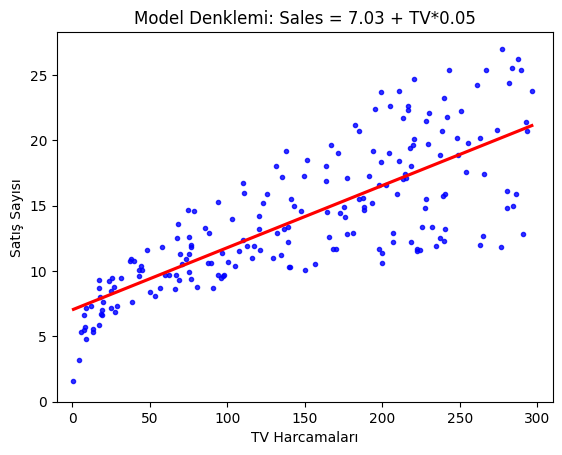

In [4]:
##########################
# Tahmin
##########################

# 150 birimlik TV harcaması olsa ne kadar satış olması beklenir?

reg_model.intercept_[0] + reg_model.coef_[0][0]*150

# 500 birimlik tv harcaması olsa ne kadar satış olur?

reg_model.intercept_[0] + reg_model.coef_[0][0]*500

df.describe().T


# Modelin Görselleştirilmesi
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")

g.set_title(f"Model Denklemi: Sales = {round(reg_model.intercept_[0], 2)} + TV*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

In [5]:
##########################
# Tahmin Başarısı
##########################

# MSE
y_pred = reg_model.predict(X)
mean_squared_error(y, y_pred)
# 10.51
y.mean()
y.std()

# RMSE
np.sqrt(mean_squared_error(y, y_pred))
# 3.24

# MAE
mean_absolute_error(y, y_pred)
# 2.54

# R-KARE# veri setindeki bagımsız degişkenlerin bagımlı değişkeni açıklama yuzdesidir. LinearReg degeridir.
#degişken sayısı arttıkca r kare sısmeye meyillidir. bu nedenle duzeltilmiş r kare değeri de goz onunde bulundurulmalıdır.
#konuya istatistiki açıdan yaklasmıyoruz tek isteğimiz tahmin modelimizin basarısı. Basit ve çoklu linear reg modellerinde
#dolayısıyla yuksek tahmin basarılı modeller degildir.
reg_model.score(X, y)


0.611875050850071

In [6]:
######################################################
# Multiple Linear Regression
######################################################

df = pd.read_csv("/kaggle/input/dataset-for-linear-regression/advertising.csv")

X = df.drop('sales', axis=1)

y = df[["sales"]]



In [7]:
##########################
# Model
##########################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

y_test.shape
y_train.shape

reg_model = LinearRegression().fit(X_train, y_train)

# sabit (b - bias)
reg_model.intercept_

# coefficients (w - weights)
reg_model.coef_


array([[0.0468431 , 0.17854434, 0.00258619]])

In [8]:
# Aşağıdaki gözlem değerlerine göre satışın beklenen değeri nedir?

# TV: 30
# radio: 10
# newspaper: 40

# 2.90
# 0.0468431 , 0.17854434, 0.00258619

reg_model.intercept_[0] + reg_model.coef_[0][0]* 30 + reg_model.coef_[0][1]* 10 + reg_model.coef_[0][2]* 40

2.90794702 + 30 * 0.0468431 + 10 * 0.17854434 + 40 * 0.00258619



6.20213102

In [9]:
yeni_veri = [[30], [10], [40]]
yeni_veri = pd.DataFrame(yeni_veri).T

reg_model.predict(yeni_veri)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[6.202131]])

In [10]:
##########################
# Tahmin Başarısını Değerlendirme
##########################

#########holdout yonteri train-test split

# Train RMSE
y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))
# 1.73

# TRAIN RKARE
reg_model.score(X_train, y_train)

# Test RMSE
y_pred = reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))
# 1.41
#normalde test hatası train hatasından daha yuksek cıkar tam tersi çok guzel bir sonuc 

# Test RKARE
reg_model.score(X_test, y_test)

#########cross validation yondetmi
# 10 Katlı CV RMSE
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=10,
                                 scoring="neg_mean_squared_error")))

# 1.69


# 5 Katlı CV RMSE
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=5,
                                 scoring="neg_mean_squared_error")))
# 1.71

#Yani buradaki hatalardan hangisine güvenmem lazım?” Veri setimiz bol olsaydı çok fark etmeyebilirdi. 
#Bu yorumu yapmak yanlış olmaz.. Fakat veri setimizin boyutu az olduğundan dolayı bu durumda 10 katlı 
#çapraz doğrulama yöntemine daha fazla güvenmek, daha doğrudur. Diğer yandan veri setinin boyutu az.
#Dolayısıyla “10 parça yerine 5 parça yapsak mı acaba?” yorumu da geçerlidir.

1.7175247278732086

In [11]:
######################################################
# Simple Linear Regression with Gradient Descent from Scratch
######################################################

# Cost function MSE
def cost_function(Y, b, w, X):
    m = len(Y)
    sse = 0

    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        sse += (y_hat - y) ** 2

    mse = sse / m
    return mse


In [12]:
# update_weights
def update_weights(Y, b, w, X, learning_rate):
    m = len(Y)
    b_deriv_sum = 0
    w_deriv_sum = 0
    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        b_deriv_sum += (y_hat - y)
        w_deriv_sum += (y_hat - y) * X[i]
    new_b = b - (learning_rate * 1 / m * b_deriv_sum)
    new_w = w - (learning_rate * 1 / m * w_deriv_sum)
    return new_b, new_w

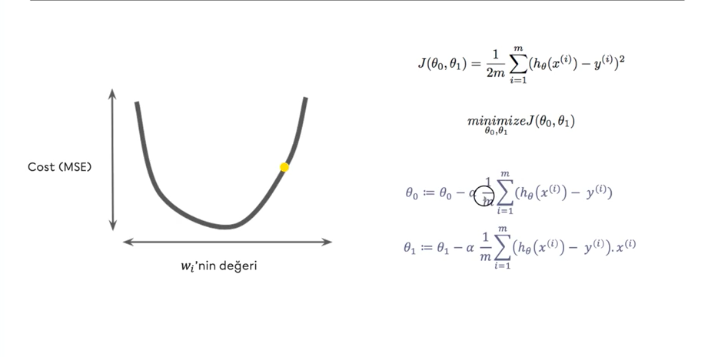

Şimdi dikkat! “Parametre nedir, hiperparametre nedir?” Parametre modelin veriyi kullanarak veriden hareketle bulduğu değerlerdir. Yani ağırlıklar var ve bu ağırlıklar veri setinden bulunur. Hiperparametreler ise veri setinden bulunamayan ve kullanıcı tarafından ayarlanması gereken parametrelerdir. Burada gradient descent yöntemi kullanıldığımdan dolayı kullanıcı tarafından verilmesi gereken hiperparametreler söz konusu. Yani burada learning rate, iterasyon sayısı ve başlangıç ağırlıklarının ne olması gerektiğini kullanıcı olarak belirlememiz gerekmektedir. Normal denklemler yöntemiyle gradient descent yöntemi arasında doğrusal regresyon açısından kat sayı bulma, ağırlık bulma açısından ne gibi farklılıklar vardır, işte olası farklılıklardan birisi budur. Yani ağırlıkları bulma görevimiz var. Bunu anlıyoruz ki birisini normal denklemler yöntemiyle direkt analitik bir şekilde çözdük, diğeri bir optimizasyon yöntemiydi. Gradient descent sürece dayalı olarak gerçekleşiyordu ve bir diğer yeni tespit ettiğimiz durum ise ayarlanması gereken hiperparametreler vardır. “Normal denklemler yönteminde böyle bir şey var mıydı?” Yoktu, direkt uyguladık, geçtik.

In [13]:
# train fonksiyonu
def train(Y, initial_b, initial_w, X, learning_rate, num_iters):

    print("Starting gradient descent at b = {0}, w = {1}, mse = {2}".format(initial_b, initial_w,
                                                                   cost_function(Y, initial_b, initial_w, X)))

    b = initial_b
    w = initial_w
    cost_history = []

    for i in range(num_iters):
        b, w = update_weights(Y, b, w, X, learning_rate)
        mse = cost_function(Y, b, w, X)
        cost_history.append(mse)


        if i % 100 == 0:
            print("iter={:d}    b={:.2f}    w={:.4f}    mse={:.4}".format(i, b, w, mse))


    print("After {0} iterations b = {1}, w = {2}, mse = {3}".format(num_iters, b, w, cost_function(Y, b, w, X)))
    return cost_history, b, w


df = pd.read_csv("/kaggle/input/dataset-for-linear-regression/advertising.csv")

X = df["radio"]
Y = df["sales"]

# hyperparameters
learning_rate = 0.001
initial_b = 0.001
initial_w = 0.001
num_iters = 10000

cost_history, b, w = train(Y, initial_b, initial_w, X, learning_rate, num_iters)

Starting gradient descent at b = 0.001, w = 0.001, mse = 222.9477491673001
iter=0    b=0.01    w=0.3708    mse=53.25
iter=100    b=0.28    w=0.4788    mse=41.6
iter=200    b=0.54    w=0.4709    mse=40.29
iter=300    b=0.79    w=0.4633    mse=39.04
iter=400    b=1.03    w=0.4559    mse=37.87
iter=500    b=1.27    w=0.4487    mse=36.76
iter=600    b=1.49    w=0.4417    mse=35.72
iter=700    b=1.72    w=0.4349    mse=34.73
iter=800    b=1.93    w=0.4283    mse=33.8
iter=900    b=2.14    w=0.4219    mse=32.92
iter=1000    b=2.35    w=0.4157    mse=32.09
iter=1100    b=2.54    w=0.4096    mse=31.3
iter=1200    b=2.74    w=0.4037    mse=30.56
iter=1300    b=2.92    w=0.3980    mse=29.87
iter=1400    b=3.10    w=0.3925    mse=29.21
iter=1500    b=3.28    w=0.3871    mse=28.58
iter=1600    b=3.45    w=0.3818    mse=28.0
iter=1700    b=3.62    w=0.3767    mse=27.44
iter=1800    b=3.78    w=0.3718    mse=26.92
iter=1900    b=3.94    w=0.3670    mse=26.42
iter=2000    b=4.09    w=0.3623    mse=25